<a href="https://colab.research.google.com/github/camilla8989/pythonstudy/blob/house-price-prediction/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

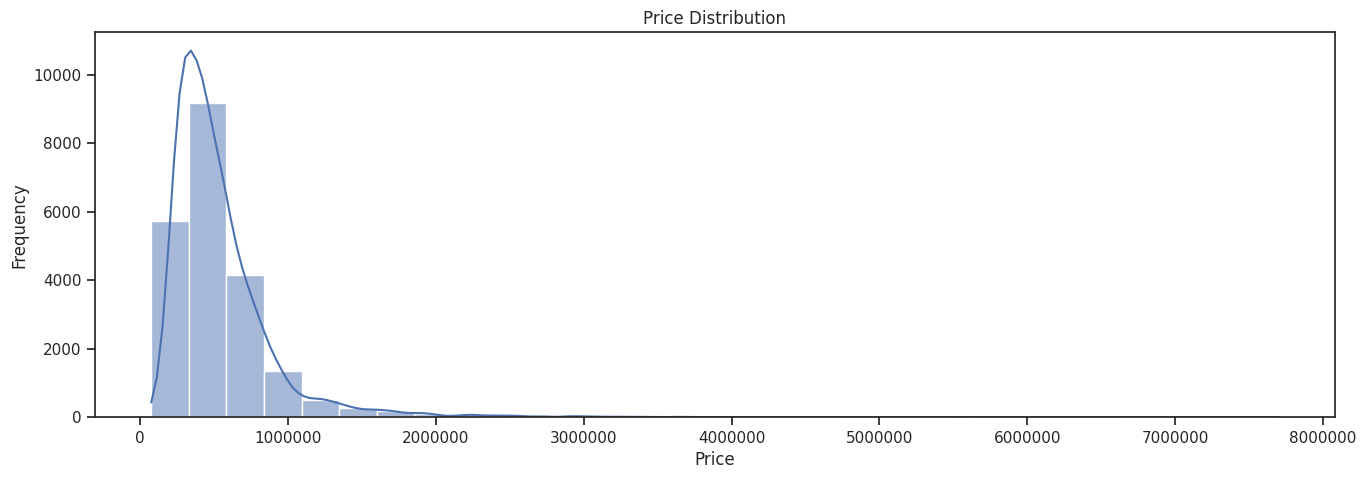

Price Information:
count     21613.00
mean     540182.16
std      367362.23
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64
Kurtosis: 34.522444410072566
Skewness: 4.021715573048684


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv("house_dataset.csv")

# Set the number of decimal places displayed
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# plot histogram
plt.figure(figsize=(16, 5))
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain', axis='x')  
plt.show()

# print price info
print("Price Information:")
print(df['price'].describe())

# comput kurtosis & skewness
kurtosis = df['price'].kurtosis()
skewness = df['price'].skew()

# print kurtosis & skewness
print("Kurtosis:", kurtosis)
print("Skewness:", skewness)


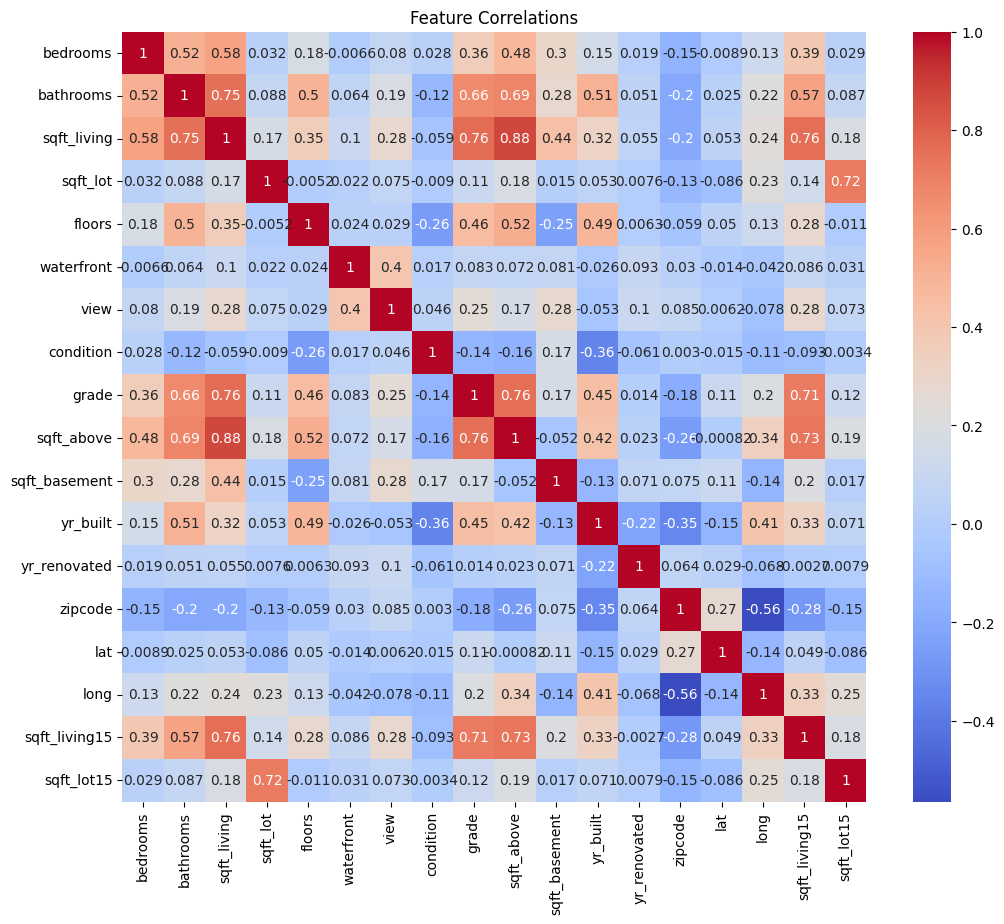

Feature correlations:
Features with correlation > 0.5:
Correlated features for 'bedrooms': bathrooms, sqft_living
Correlated features for 'bathrooms': bedrooms, sqft_living, floors, grade, sqft_above, yr_built, sqft_living15
Correlated features for 'sqft_living': bedrooms, bathrooms, grade, sqft_above, sqft_living15
Correlated features for 'sqft_lot': sqft_lot15
Correlated features for 'floors': bathrooms, sqft_above
Correlated features for 'grade': bathrooms, sqft_living, sqft_above, sqft_living15
Correlated features for 'sqft_above': bathrooms, sqft_living, floors, grade, sqft_living15
Correlated features for 'yr_built': bathrooms
Correlated features for 'sqft_living15': bathrooms, sqft_living, grade, sqft_above
Correlated features for 'sqft_lot15': sqft_lot


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('house_dataset.csv')

# Drop 'id', 'date', and 'price' columns
df = df.drop(['id', 'date', 'price'], axis=1)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.values)

# Create a DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

# Compute correlation matrix
corr_matrix = df_scaled.corr()

# Plot heatmap of feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

# Print features with correlation > 0.5
print("Features with correlation > 0.5:")
for feature in corr_matrix.columns:
    correlated_features = corr_matrix[corr_matrix[feature] > 0.5].index.tolist()
    correlated_features.remove(feature)
    if correlated_features:
        print(f"Correlated features for '{feature}': {', '.join(correlated_features)}")

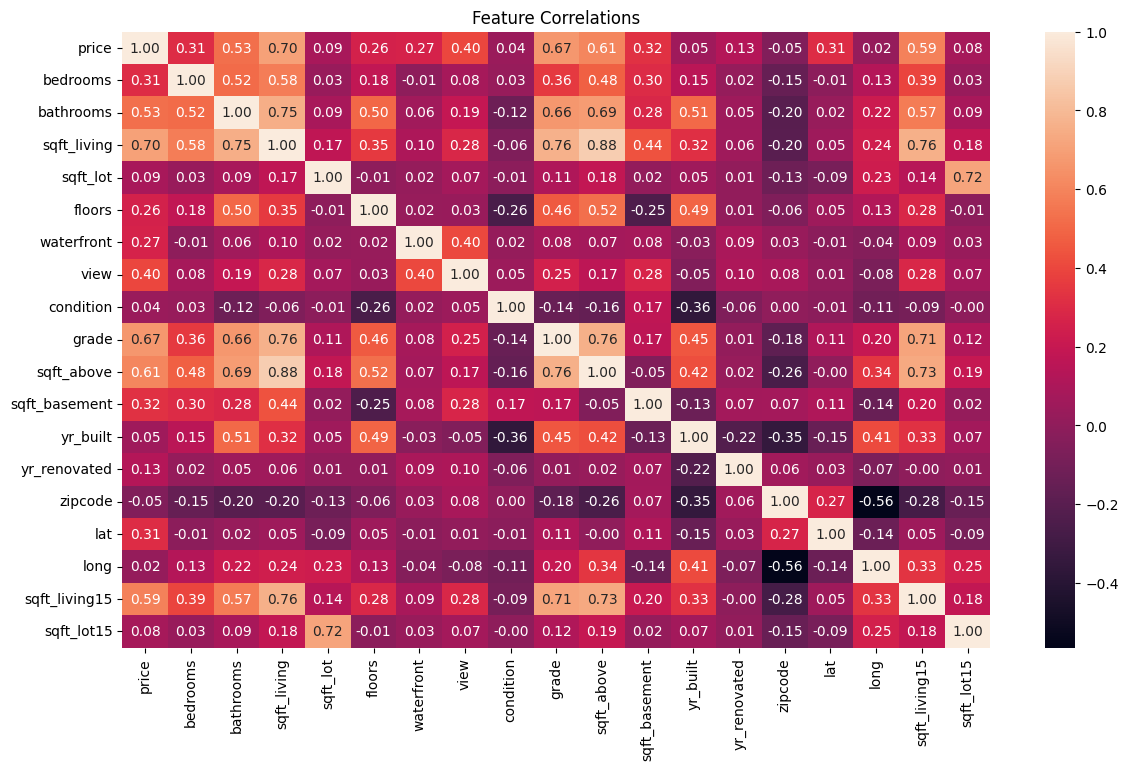

Features ranked by absolute correlation with price:
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
zipcode          0.053168
condition        0.036392
long             0.021571
Name: price, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('house_dataset.csv')

# Drop 'id' and 'date' columns
df = df.drop(['id', 'date'], axis=1)

# Extract features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute Pearson correlation coefficients between each feature and the target variable
correlations = df.corr()['price'].drop('price')

# Plot heatmap of feature correlations with price
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Feature Correlations")
plt.show()

# Print features in descending order of absolute correlation with price
print("Features ranked by absolute correlation with price:")
print(correlations.abs().sort_values(ascending=False))


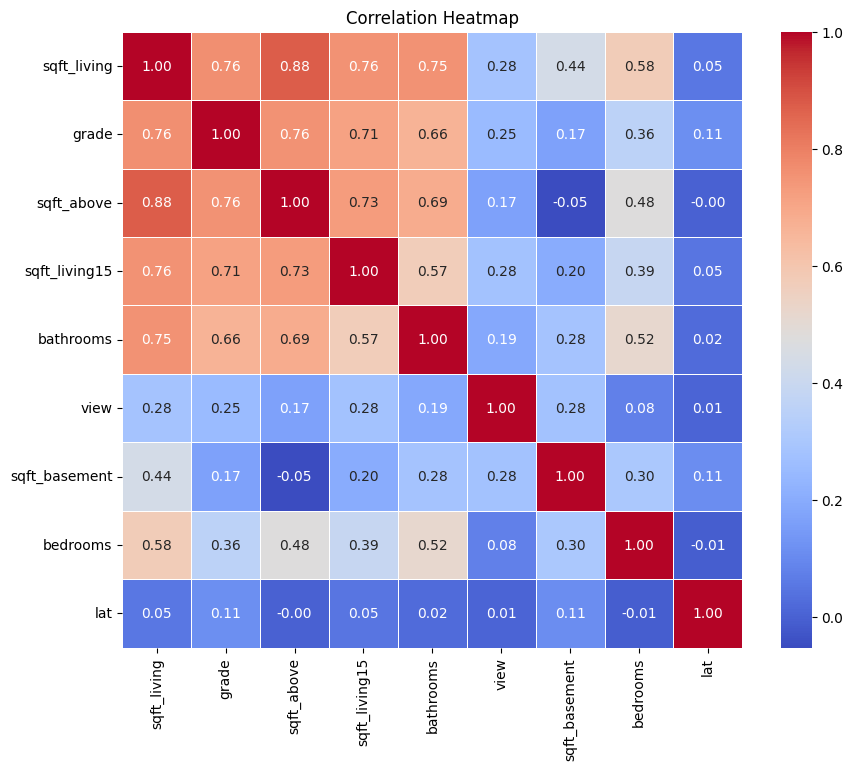

Correlation values:
Correlated features for 'sqft_living': grade, sqft_above, sqft_living15, bathrooms, bedrooms
Correlated features for 'grade': sqft_living, sqft_above, sqft_living15, bathrooms
Correlated features for 'sqft_above': sqft_living, grade, sqft_living15, bathrooms
Correlated features for 'sqft_living15': sqft_living, grade, sqft_above, bathrooms
Correlated features for 'bathrooms': sqft_living, grade, sqft_above, sqft_living15, bedrooms
Correlated features for 'bedrooms': sqft_living, bathrooms


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('house_dataset.csv')

# Remove 'id', 'date', 'price' columns
df_filtered = df.drop(['id', 'date', 'price'], axis=1)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filtered)

# Create a DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df_filtered.columns)

# Select specific features for correlation analysis
selected_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']

# Perform correlation analysis
corr_matrix = df_scaled[selected_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Print correlation values
print("Correlation values:")
for feature in corr_matrix.columns:
    correlated_features = corr_matrix[corr_matrix[feature] > 0.5].index.tolist()
    correlated_features.remove(feature)
    if correlated_features:
        print(f"Correlated features for '{feature}': {', '.join(correlated_features)}")


Epoch 1/100
411/411 [==============================] - 3s 4ms/step - loss: 142023688192.0000 - mean_squared_error: 142023688192.0000 - mean_absolute_error: 310939.2500 - val_loss: 40862978048.0000 - val_mean_squared_error: 40862978048.0000 - val_mean_absolute_error: 159155.5469
Epoch 2/100
411/411 [==============================] - 1s 3ms/step - loss: 28100141056.0000 - mean_squared_error: 28100141056.0000 - mean_absolute_error: 128356.1406 - val_loss: 19943624704.0000 - val_mean_squared_error: 19943624704.0000 - val_mean_absolute_error: 105351.2656
Epoch 3/100
411/411 [==============================] - 1s 3ms/step - loss: 16764293120.0000 - mean_squared_error: 16764293120.0000 - mean_absolute_error: 96624.8516 - val_loss: 17214398464.0000 - val_mean_squared_error: 17214398464.0000 - val_mean_absolute_error: 98223.8047
Epoch 4/100
411/411 [==============================] - 1s 3ms/step - loss: 15670088704.0000 - mean_squared_error: 15670088704.0000 - mean_absolute_error: 93459.2969 - va

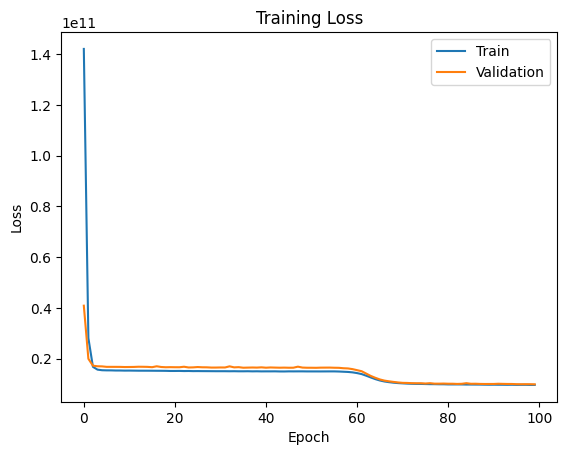

129/129 [==============================] - 0s 2ms/step
MSE: 9786976681.985313
R^2: 0.777814142042718


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# 读取数据集
df = pd.read_csv('house_dataset.csv')

# 根据房价排序
df = df.sort_values('price')

# 计算要去掉的样本数量
remove_samples = int(len(df) * 0.05)

# 去掉价格最高的5%样本
df = df.iloc[:-remove_samples]

# 选择主要特征值
features = ['grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']
target = 'price'

# 处理缺失值或异常值
df = df.dropna()  # 删除包含缺失值的样本
df = df[df['price'] > 0]  # 删除价格为非正值的样本

# 提取特征和目标变量
X = df[features]
y = df[target]

# 标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# 编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

# 定义EarlyStopping回调函数
early_stopping = EarlyStopping(patience=50, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# 绘制训练误差折线图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 使用训练好的模型进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印评估结果
print("MSE:", mse)
print("R^2:", r2)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read data
df = pd.read_csv('house_dataset.csv')

# Calculate the number of samples to remove
remove_samples = int(len(df) * 0.05)

# Remove the 5% samples with the highest price
df = df.iloc[:-remove_samples]

# Removing Missing or Outliers
df = df.dropna()  
df = df[df['price'] > 0]  

# Choose the main features
features = ['grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']
target = 'price'

# Extract features and target variables
X = df[features]
y = df[target]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Define the hyperparameter space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define Random Forest Regression Model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter Tuning Using Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the value range of the hyperparameter
param_values = [str(x) for x in grid_search.param_grid.values()]

# Extract the mean squared error for each hyperparameter combination
mse_scores = -grid_search.cv_results_['mean_test_score']

# Plot hyperparameters versus mean squared error
plt.figure(figsize=(10, 6))
plt.plot(param_values, mse_scores, marker='o')
plt.title('Grid Search Results')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print the optimal hyperparameters
print("Optimal Hyperparameters:", grid_search.best_params_)

# Make predictions using models with optimized hyperparameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print assessment results
print("MSE:", mse)
print("R^2:", r2)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Epoch 1/100
433/433 [==============================] - 2s 3ms/step - loss: 199962771456.0000 - mean_squared_error: 199962771456.0000 - mean_absolute_error: 333326.5625 - val_loss: 74794844160.0000 - val_mean_squared_error: 74794844160.0000 - val_mean_absolute_error: 190584.9844
Epoch 2/100
433/433 [==============================] - 1s 2ms/step - loss: 49226743808.0000 - mean_squared_error: 49226743808.0000 - mean_absolute_error: 156793.4062 - val_loss: 51383975936.0000 - val_mean_squared_error: 51383975936.0000 - val_mean_absolute_error: 145084.5000
Epoch 3/100
433/433 [==============================] - 1s 3ms/step - loss: 34994069504.0000 - mean_squared_error: 34994069504.0000 - mean_absolute_error: 123801.5234 - val_loss: 44883529728.0000 - val_mean_squared_error: 44883529728.0000 - val_mean_absolute_error: 123835.2812
Epoch 4/100
433/433 [==============================] - 1s 3ms/step - loss: 31228700672.0000 - mean_squared_error: 31228700672.0000 - mean_absolute_error: 112921.5156 -

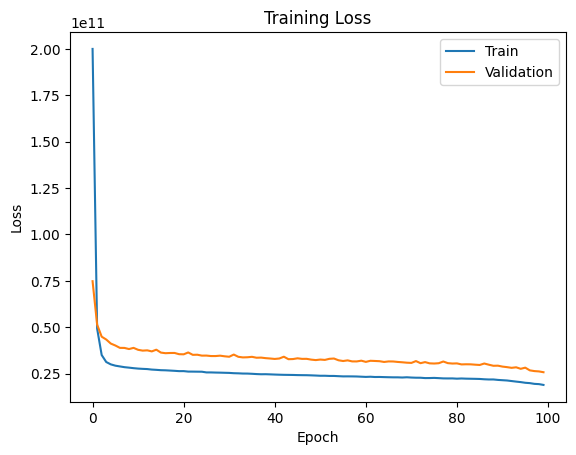

136/136 [==============================] - 0s 1ms/step
MSE: 22846302906.08288
R^2: 0.8436126342171937


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# 读取数据集
df = pd.read_csv('house_dataset.csv')

# 根据房价排序
df = df.sort_values('price')

# 去掉最高和最低房价样本
df = df.iloc[1:-1]

# 选择主要特征值
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms',
            'lat', 'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'zipcode',
            'condition', 'long']
target = 'price'

# 处理缺失值或异常值
df = df.dropna()  # 删除包含缺失值的样本
df = df[df['price'] > 0]  # 删除价格为非正值的样本

# 提取特征和目标变量
X = df[features]
y = df[target]

# 标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# 编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

# 定义EarlyStopping回调函数
early_stopping = EarlyStopping(patience=50, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# 绘制训练误差折线图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 使用训练好的模型进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印评估结果
print("MSE:", mse)
print("R^2:", r2)


Epoch 1/100
433/433 [==============================] - 3s 4ms/step - loss: 404838711296.0000 - mean_squared_error: 404838711296.0000 - mean_absolute_error: 533410.0000 - val_loss: 472912330752.0000 - val_mean_squared_error: 472912330752.0000 - val_mean_absolute_error: 555565.1875
Epoch 2/100
433/433 [==============================] - 1s 3ms/step - loss: 404721565696.0000 - mean_squared_error: 404721565696.0000 - mean_absolute_error: 533300.4375 - val_loss: 472791777280.0000 - val_mean_squared_error: 472791777280.0000 - val_mean_absolute_error: 555456.5000
Epoch 3/100
433/433 [==============================] - 1s 3ms/step - loss: 404606713856.0000 - mean_squared_error: 404606713856.0000 - mean_absolute_error: 533192.1250 - val_loss: 472671879168.0000 - val_mean_squared_error: 472671879168.0000 - val_mean_absolute_error: 555348.8125
Epoch 4/100
433/433 [==============================] - 1s 2ms/step - loss: 404491665408.0000 - mean_squared_error: 404491665408.0000 - mean_absolute_error: 5

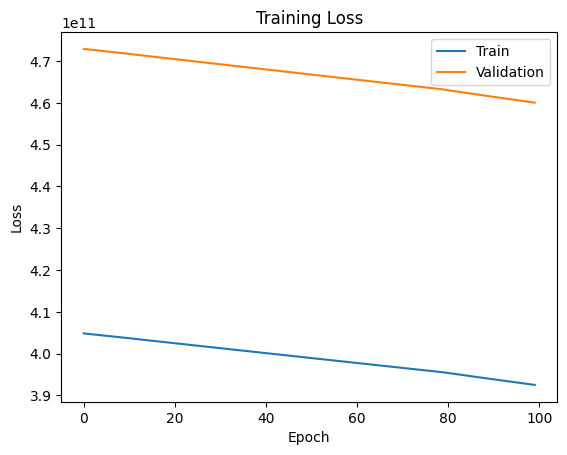

136/136 [==============================] - 0s 1ms/step
MSE: 433280954808.5719
R^2: -1.9658920064624796


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# 读取数据集
df = pd.read_csv('house_dataset.csv')

# 根据房价排序
df = df.sort_values('price')

# 去掉最高和最低房价样本
df = df.iloc[1:-1]

# 选择主要特征值
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms',
            'lat', 'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'zipcode',
            'condition', 'long']
target = 'price'

# 处理缺失值或异常值
df = df.dropna()  # 删除包含缺失值的样本
df = df[df['price'] > 0]  # 删除价格为非正值的样本

# 提取特征和目标变量
X = df[features]
y = df[target]

# 标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')
])

# 编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

# 定义EarlyStopping回调函数
early_stopping = EarlyStopping(patience=50, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# 绘制训练误差折线图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 使用训练好的模型进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印评估结果
print("MSE:", mse)
print("R^2:", r2)


Epoch 1/100
411/411 [==============================] - 2s 4ms/step - loss: 272353280000.0000 - mean_squared_error: 272353280000.0000 - mean_absolute_error: 477377.3125 - val_loss: 281663340544.0000 - val_mean_squared_error: 281663340544.0000 - val_mean_absolute_error: 484790.3750
Epoch 2/100
411/411 [==============================] - 2s 4ms/step - loss: 272246407168.0000 - mean_squared_error: 272246407168.0000 - mean_absolute_error: 477265.1250 - val_loss: 281557598208.0000 - val_mean_squared_error: 281557598208.0000 - val_mean_absolute_error: 484681.1875
Epoch 3/100
411/411 [==============================] - 2s 4ms/step - loss: 272142893056.0000 - mean_squared_error: 272142893056.0000 - mean_absolute_error: 477157.0625 - val_loss: 281453166592.0000 - val_mean_squared_error: 281453166592.0000 - val_mean_absolute_error: 484573.5938
Epoch 4/100
411/411 [==============================] - 1s 3ms/step - loss: 272040738816.0000 - mean_squared_error: 272040738816.0000 - mean_absolute_error: 4

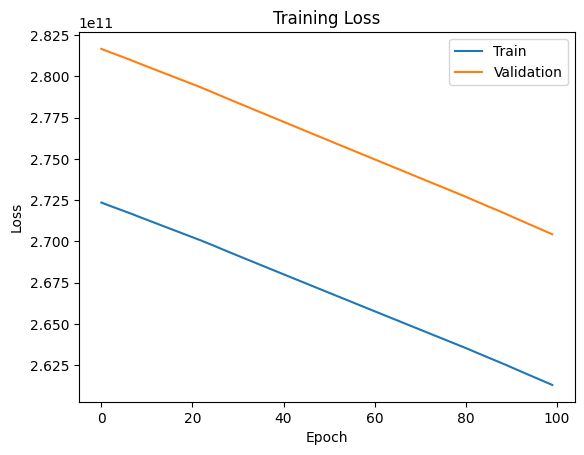

129/129 [==============================] - 0s 2ms/step
MSE: 263290435440.25247
R^2: -4.9772709378083535


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# 读取数据集
df = pd.read_csv('house_dataset.csv')

# 根据房价排序
df = df.sort_values('price')

# 计算要去掉的样本数量
remove_samples = int(len(df) * 0.05)

# 去掉价格最高的5%样本
df = df.iloc[:-remove_samples]

# 选择主要特征值
features = ['grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']
target = 'price'

# 处理缺失值或异常值
df = df.dropna()  # 删除包含缺失值的样本
df = df[df['price'] > 0]  # 删除价格为非正值的样本

# 提取特征和目标变量
X = df[features]
y = df[target]

# 标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')
])

# 编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

# 定义EarlyStopping回调函数
early_stopping = EarlyStopping(patience=50, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# 绘制训练误差折线图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 使用训练好的模型进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印评估结果
print("MSE:", mse)
print("R^2:", r2)


Epoch 1/100
433/433 [==============================] - 4s 5ms/step - loss: 102964682752.0000 - mean_squared_error: 102964682752.0000 - mean_absolute_error: 205236.7969 - val_loss: 42505310208.0000 - val_mean_squared_error: 42505310208.0000 - val_mean_absolute_error: 120710.8906
Epoch 2/100
433/433 [==============================] - 1s 3ms/step - loss: 30125414400.0000 - mean_squared_error: 30125414400.0000 - mean_absolute_error: 109903.8047 - val_loss: 38712442880.0000 - val_mean_squared_error: 38712442880.0000 - val_mean_absolute_error: 115346.6406
Epoch 3/100
433/433 [==============================] - 1s 3ms/step - loss: 28666261504.0000 - mean_squared_error: 28666261504.0000 - mean_absolute_error: 106671.5781 - val_loss: 38113378304.0000 - val_mean_squared_error: 38113378304.0000 - val_mean_absolute_error: 112923.6719
Epoch 4/100
433/433 [==============================] - 1s 3ms/step - loss: 28298446848.0000 - mean_squared_error: 28298446848.0000 - mean_absolute_error: 105586.4688 -

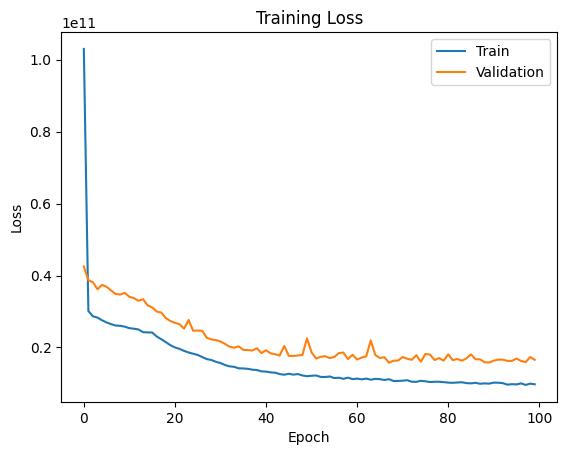

136/136 [==============================] - 0s 1ms/step
MSE: 15890413002.065973
R^2: 0.8912270470714848


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# 读取数据集
df = pd.read_csv('house_dataset.csv')

# 根据房价排序
df = df.sort_values('price')

# 去掉最高和最低房价样本
df = df.iloc[1:-1]

# 选择主要特征值
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms',
            'lat', 'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'zipcode',
            'condition', 'long']
target = 'price'

# 处理缺失值或异常值
df = df.dropna()  # 删除包含缺失值的样本
df = df[df['price'] > 0]  # 删除价格为非正值的样本

# 提取特征和目标变量
X = df[features]
y = df[target]

# 标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# 编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

# 定义EarlyStopping回调函数
early_stopping = EarlyStopping(patience=50, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# 绘制训练误差折线图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 使用训练好的模型进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印评估结果
print("MSE:", mse)
print("R^2:", r2)


Epoch 1/100
411/411 [==============================] - 4s 4ms/step - loss: 66733412352.0000 - mean_squared_error: 66733412352.0000 - mean_absolute_error: 180868.8281 - val_loss: 17574799360.0000 - val_mean_squared_error: 17574799360.0000 - val_mean_absolute_error: 98454.3672
Epoch 2/100
411/411 [==============================] - 2s 5ms/step - loss: 15755624448.0000 - mean_squared_error: 15755624448.0000 - mean_absolute_error: 93331.6172 - val_loss: 16973454336.0000 - val_mean_squared_error: 16973454336.0000 - val_mean_absolute_error: 96827.1250
Epoch 3/100
411/411 [==============================] - 2s 4ms/step - loss: 15585135616.0000 - mean_squared_error: 15585135616.0000 - mean_absolute_error: 92866.5234 - val_loss: 16850902016.0000 - val_mean_squared_error: 16850902016.0000 - val_mean_absolute_error: 96275.2031
Epoch 4/100
411/411 [==============================] - 1s 4ms/step - loss: 15459530752.0000 - mean_squared_error: 15459530752.0000 - mean_absolute_error: 92306.1250 - val_los

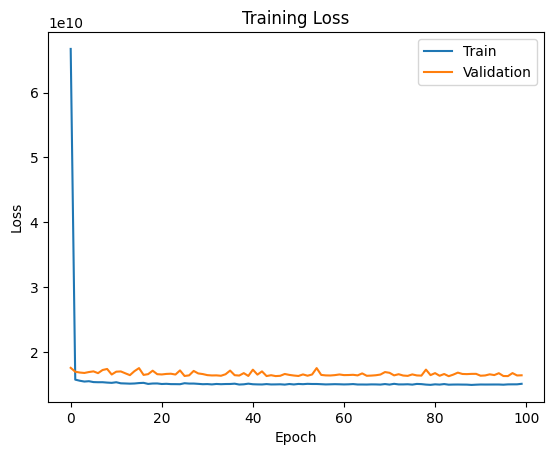

129/129 [==============================] - 0s 2ms/step
MSE: 15455265607.859732
R^2: 0.6491315387150383


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# 读取数据集
df = pd.read_csv('house_dataset.csv')

# 根据房价排序
df = df.sort_values('price')

# 计算要去掉的样本数量
remove_samples = int(len(df) * 0.05)

# 去掉价格最高的5%样本
df = df.iloc[:-remove_samples]

# 选择主要特征值
features = ['grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']
target = 'price'

# 处理缺失值或异常值
df = df.dropna()  # 删除包含缺失值的样本
df = df[df['price'] > 0]  # 删除价格为非正值的样本

# 提取特征和目标变量
X = df[features]
y = df[target]

# 标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# 编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

# 定义EarlyStopping回调函数
early_stopping = EarlyStopping(patience=50, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# 绘制训练误差折线图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 使用训练好的模型进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印评估结果
print("MSE:", mse)
print("R^2:", r2)
